In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tqdm

All the data are images with four ions (qubits).

- **Bright**: All ions are prepared in the $\left | 1111 \right >$ state.
- **Dark**: All ions are prepared in the $\left | 0000 \right >$ state.
- **Halfpi**: All ions are prepared in the superposition of all possible states. This means that each ion has an equal probability of being in any of the states $\left | 0000 \right >$, $\left | 0001 \right >$, $\left | 0010 \right >$, $\left | 0011 \right >$, ..., $\left | 1111 \right >$.

**Questions:**

1. Can we train an autoencoder to extract information from the images, given that there are only four ions in each image? Would we only need four or more latent variables for this task?
2. Is it possible to train a classifier using the labeled data from the `Bright` and `Dark` datasets, while leveraging the fact that the states of the ions in the `Halfpi` dataset are independent?


For the second research question, we propose a solution that involves defining an error function that combines the classification error and correlation error. Specifically, we define the error function as:

```
error = classification_error + correlation_error
```

When we do the training, we can get the gradient of `classification_error` with `Bright` and `Dark` datasets as these data are labeled. 

As for the `correlation_error`, we can calculate it with the correlation function, and evaluate it with a batch of data sampled form `Halfpi`. 
We can define the correlation error as:
```python
correlation_error = correlation_coefficient ** 2 # or absolute value
```

We can obtain the gradient of the classification_error using the labeled data from the `Bright` and `Dark` datasets. For the `correlation_error`, we can calculate it using the correlation function, which we define as the  correlation coefficient between the states of the different ions. 
We can define the `correlation_error` as the squared correlation coefficient (or the absolute value of it).
With that, we can then evaluate the correlation coefficient and its gradient using a batch of data sampled from the `Halfpi` dataset. We can talk more details in the meeting.

The correlation function we used in physics is spin-spin correlation, but I think it is equvalent to optimizing with [`Pearson correlation coefficient`](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) here.

In [5]:
bright = [] # all bright state data
dark = [] # all dark state data
halfpi = [] # all possible states
with h5py.File("img.h5", "r") as f:
    for i in tqdm.tqdm(range(10000)):
        bright.append(np.array(f["bright_{}".format(i)]))
        dark.append(np.array(f["dark_{}".format(i)]))
        halfpi.append(np.array(f["halfpi_{}".format(i)]))

100%|██████████| 10000/10000 [00:11<00:00, 861.24it/s]


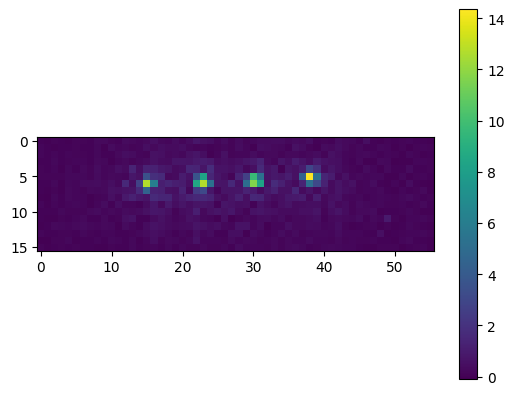

In [8]:
plt.imshow(np.mean(bright, axis=0) - np.mean(dark, axis=0))
plt.colorbar()
plt.show()